 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [76]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [77]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, parse_dates= True, index_col = 'Date', infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [78]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [79]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [80]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns= pd.read_csv(algo_returns_csv, parse_dates=True, index_col='Date',infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [81]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [82]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [83]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
sp500_history.columns = ['S&P 500']
sp500_history.sort_index(inplace = True)

In [84]:
# Check Data Types
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   S&P 500  1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [85]:
# Fix Data Types- remove $
sp500_history['S&P 500'] = sp500_history['S&P 500'].str.replace('$','')

In [86]:
# Fix Data Types- convert close to float from str
sp500_history['S&P 500'] = sp500_history['S&P 500'].astype(float)

In [87]:
# Calculate Daily Returns
sp500_daily_return = sp500_history['S&P 500'].pct_change()

In [88]:
# Drop Daily return nulls
sp500_daily_return = sp500_daily_return.dropna()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [89]:
# Concatenate all DataFrames into a single DataFrame
combined_portfolio = pd.concat([whale_returns,algo_returns, sp500_daily_return], axis ='columns', join ='inner')
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

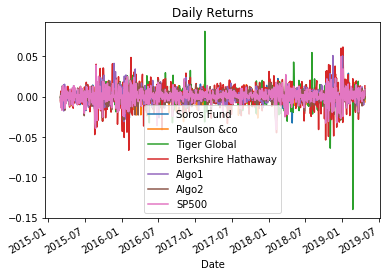

In [90]:
# Plot daily returns

combined_port_plot = combined_portfolio.plot(title= 'Daily Returns')
combined_port_plot.legend(['Soros Fund', 'Paulson &co','Tiger Global','Berkshire Hathaway', 'Algo1','Algo2','SP500'])

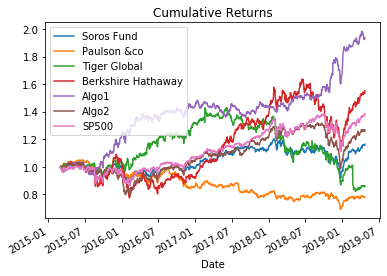

In [91]:
# Plot cumulative returns
cumulative_returns = (1+combined_portfolio).cumprod()
cumulative_returns_plot = cumulative_returns.plot(title= 'Cumulative Returns')
cumulative_returns_plot.legend(['Soros Fund', 'Paulson &co','Tiger Global','Berkshire Hathaway', 'Algo1','Algo2','SP500'])

In [92]:
#Does any portfolio outperform the stock market?
count = 0
for column in cumulative_returns:
    count +=1
    if cumulative_returns.iloc[-1][column] > cumulative_returns.iloc[-1]['S&P 500']:
        print(f'{column} beat the market with a return of {round(cumulative_returns.iloc[-1][column],2)*100}%')

BERKSHIRE HATHAWAY INC beat the market with a return of 155.0%
Algo 1 beat the market with a return of 193.0%


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

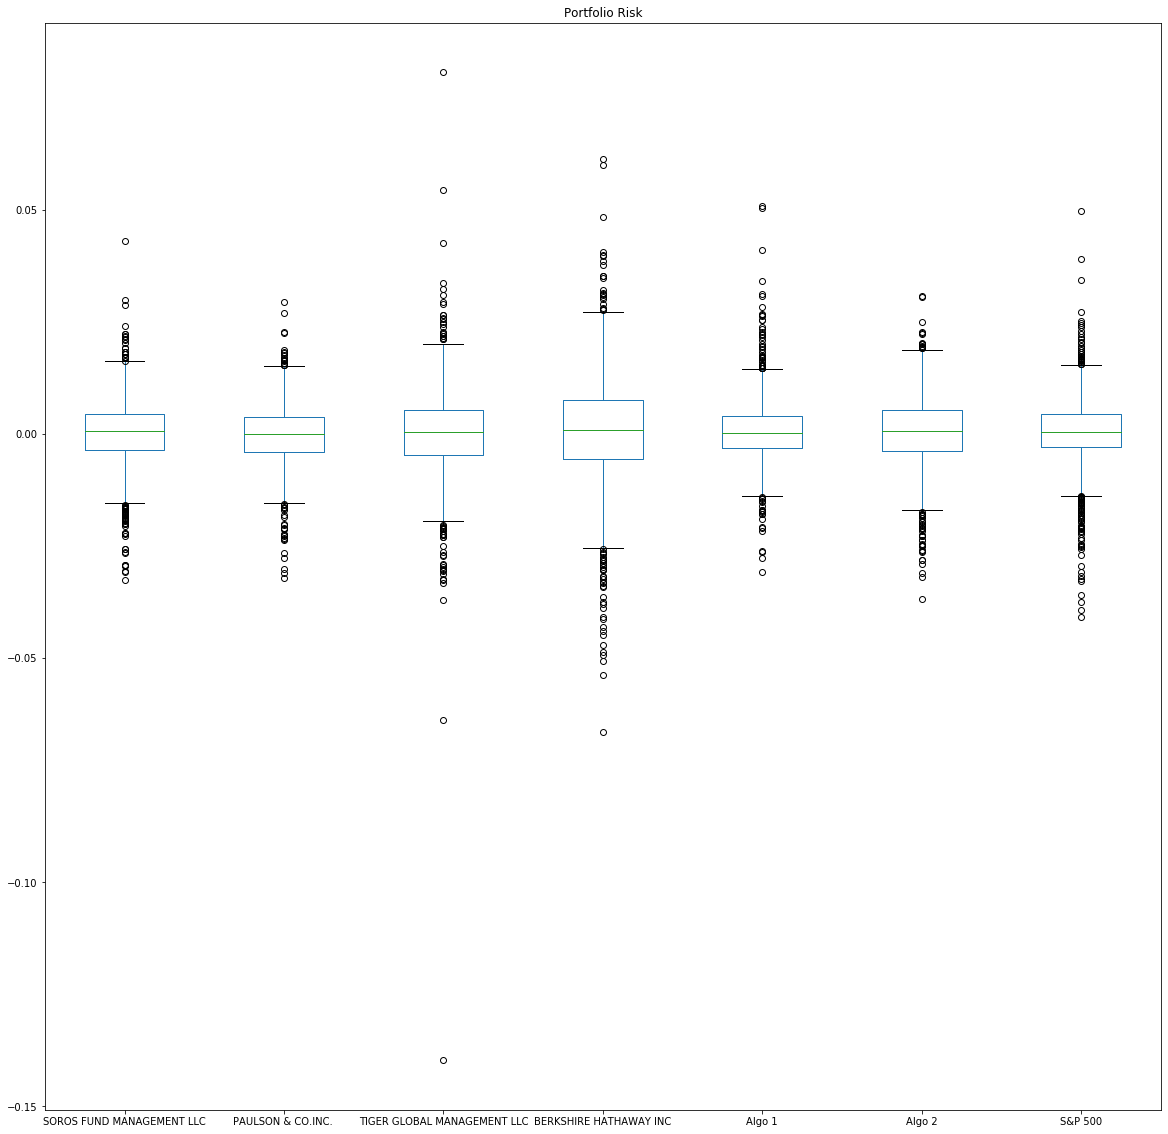

In [93]:
# Box plot to visually show risk
combined_portfolio_risk_box = combined_portfolio.plot(kind='box',title='Portfolio Risk',figsize= (20,20))

### Which box has the largest spread? Which has the smallest spread?
Berkshire Hathaway has the largest spread and Paulson & Co had the smallest*

In [94]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_portfolio.std()
daily_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [98]:
# Determine which portfolios are riskier than the S&P 500
str(True)

count = 0
for columns in daily_std:
    format_width =  50- len(daily_std.index[count])
    a = str(True)
    b = str(False)
    if  columns > daily_std['S&P 500']:
        print (f'{daily_std.index[count]} {a.rjust(format_width)}')
    else: print (f'{daily_std.index[count]} {b.rjust(format_width)}')
    count += 1
        


SOROS FUND MANAGEMENT LLC                     False
PAULSON & CO.INC.                             False
TIGER GLOBAL MANAGEMENT LLC                    True
BERKSHIRE HATHAWAY INC                         True
Algo 1                                        False
Algo 2                                        False
S&P 500                                       False


In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

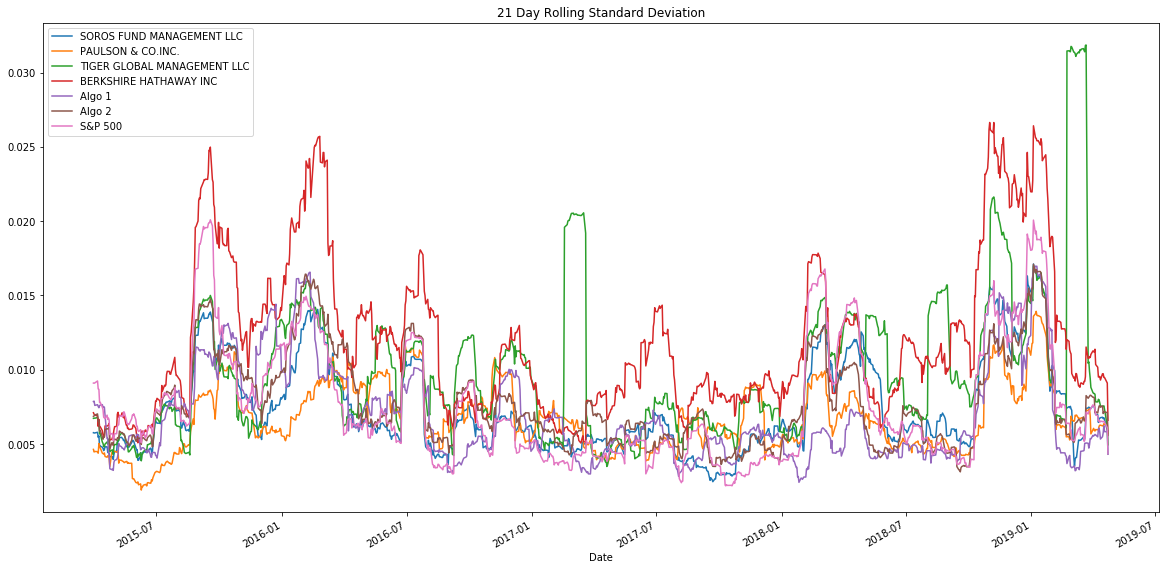

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_rolling_std = combined_portfolio.rolling(window=21).std().plot(title= '21 Day Rolling Standard Deviation',figsize = (20,10))

In [26]:
# Construct a correlation table
correlation = combined_portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


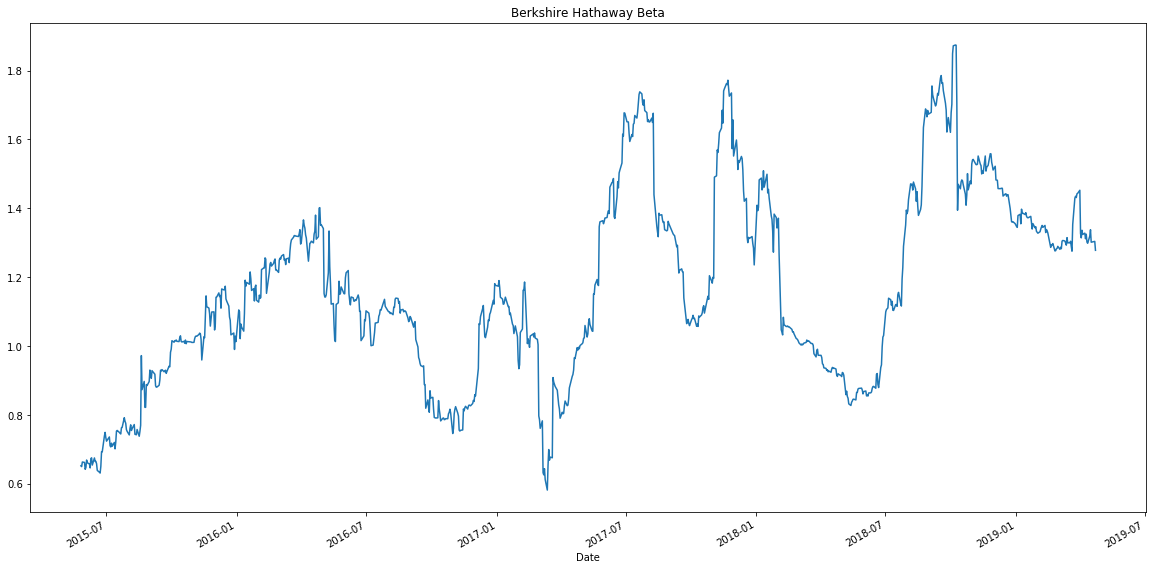

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
#covariance of single portfolio
rolling_berkshire_covariance = combined_portfolio['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_portfolio['S&P 500'])
rolling_variance = combined_portfolio['S&P 500'].rolling(window=60).var()
rolling_berkshire_beta = rolling_berkshire_covariance/rolling_variance
rolling_berkshire_beta.plot(title= 'Berkshire Hathaway Beta',figsize= (20,10))

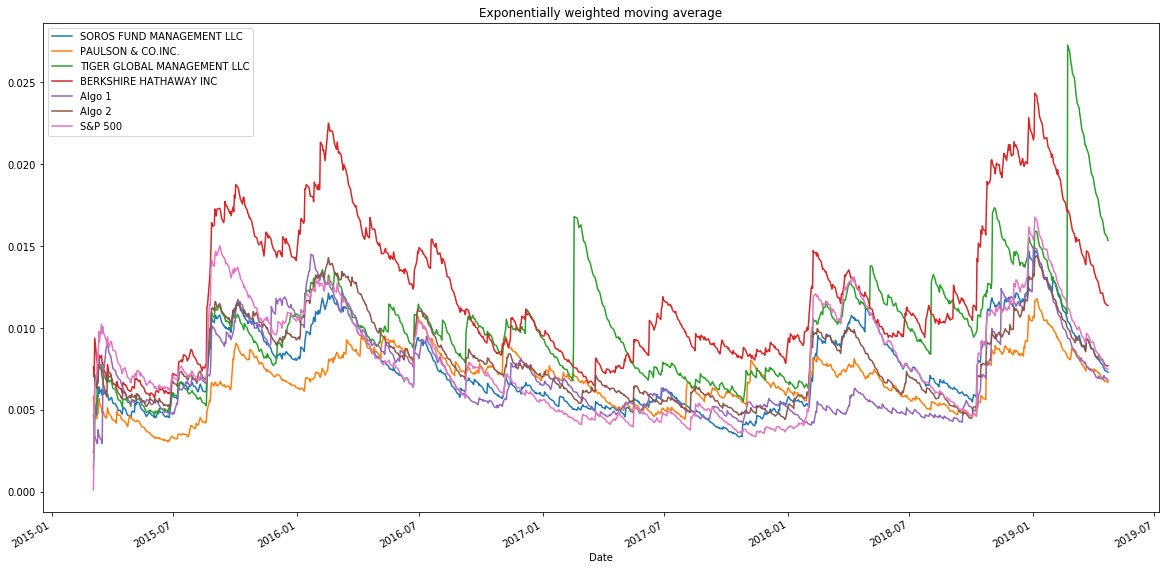

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_ewm = combined_portfolio.ewm(halflife=21).std()
combined_ewm.plot(title='Exponentially weighted moving average', figsize= (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [29]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_portfolio.mean()*252)/ (combined_portfolio.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

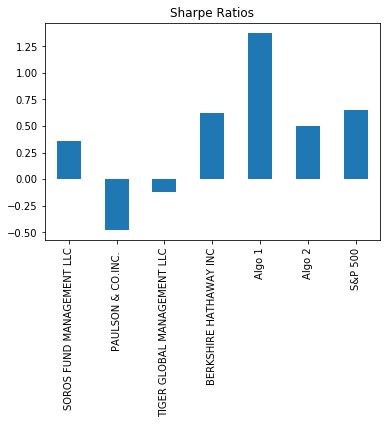

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title = 'Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

-- Algo 1 outperforms both 'the market' and the whales while Algo2 underperfomed 'the market' and Bershire Hathaway but beat the other 3 whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
klac_csv = Path('klac_history.csv')
klac_history = pd.read_csv(klac_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
klac_history['Ticker'] = 'klac'
klac_history.head()

,Close,Ticker
Date,,
2014-02-12,63.79,klac
2014-02-13,64.44,klac
2014-02-14,65.28,klac
2014-02-18,64.49,klac
2014-02-19,64.40,klac


In [32]:
#Read the second stock
gild_history_csv = Path('gild_history.csv')
gild_history = pd.read_csv(gild_history_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
gild_history['Ticker'] = 'gild_history'
gild_history.head()

,Close,Ticker
Date,,
2014-02-12,82.00,gild_history
2014-02-13,82.55,gild_history
2014-02-14,81.21,gild_history
2014-02-18,83.81,gild_history
2014-02-19,82.70,gild_history


In [33]:
# Read the third stock
dg_csv = Path('dg_history.csv')
dg_history = pd.read_csv(dg_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
dg_history['Ticker'] = 'dg'
dg_history.head()

,Close,Ticker
Date,,
2014-02-12,56.27,dg
2014-02-13,55.91,dg
2014-02-14,57.26,dg
2014-02-18,58.02,dg
2014-02-19,57.44,dg


In [34]:
# Read the fourth stock
slv_csv = Path('slv_history.csv')
slv_history = pd.read_csv(slv_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
slv_history['Ticker'] = 'slv'
slv_history.head()

,Close,Ticker
Date,,
2014-02-12,19.43,slv
2014-02-13,19.74,slv
2014-02-14,20.65,slv
2014-02-18,21.13,slv
2014-02-19,20.63,slv


In [35]:
# Read the fifth stock
amzn_csv = Path('amzn_history.csv')
amzn_history = pd.read_csv(amzn_csv,parse_dates=True, index_col='Date',infer_datetime_format=True)
amzn_history['Ticker'] = 'amzn'
amzn_history.head()

,Close,Ticker
Date,,
2014-02-12,349.25,amzn
2014-02-13,357.20,amzn
2014-02-14,357.35,amzn
2014-02-18,353.65,amzn
2014-02-19,347.38,amzn


In [36]:
# Concatenate all stocks into a single DataFrame
combined_df = pd.concat([klac_history,gild_history, dg_history,slv_history,amzn_history], axis= 'rows', join = 'inner')

In [37]:
# Reset the index
combined_df = combined_df.reset_index()

In [38]:
# Pivot so that each column of prices represents a unique symbol
combined_df = combined_df.pivot_table(values='Close', index = 'Date', columns ='Ticker')

In [39]:
# Drop Nulls
combined_df = combined_df.dropna()
combined_df.isnull().sum()

Ticker
amzn            0
dg              0
gild_history    0
klac            0
slv             0
dtype: int64

In [40]:
daily_returns = combined_df.pct_change()
daily_returns

Ticker,amzn,dg,gild_history,klac,slv
Date,,,,,
2014-02-12,NaN,NaN,NaN,NaN,NaN
2014-02-13,0.022763,-0.006398,0.006707,0.010190,0.015955
2014-02-14,0.000420,0.024146,-0.016233,0.013035,0.046099
2014-02-18,-0.010354,0.013273,0.032016,-0.012102,0.023245
2014-02-19,-0.017729,-0.009997,-0.013244,-0.001396,-0.023663
...,...,...,...,...,...
2020-09-23,-0.041269,-0.019775,-0.004890,-0.013693,-0.071084
2020-09-24,0.006644,0.003917,-0.013314,0.020742,0.018422
2020-09-25,0.024949,0.016437,0.000000,0.018262,-0.012059


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Calculate weighted portfolio returns
weights = []

def balanced_weighting():
    count = 0   
    weight_len = 0
  
    for column in daily_returns.columns:
        count +=1
    balanced_weight = 1/count
    while weight_len < count:
        weights.append(balanced_weight)
        weight_len+= 1
        
balanced_weighting()
   
my_portfolio_returns = daily_returns.dot(weights)
my_portfolio_returns.columns = ['Date', 'Custom']
my_portfolio_returns

Date
2014-02-12         NaN
2014-02-13    0.009843
2014-02-14    0.013494
2014-02-18    0.009215
2014-02-19   -0.013206
                ...   
2020-09-23   -0.030142
2020-09-24    0.007282
2020-09-25    0.009518
2020-09-28    0.020825
2020-09-29    0.000065
Length: 1670, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_returns = pd.concat([combined_portfolio,my_portfolio_returns],axis= 'columns', join = 'inner')
all_returns.rename(columns={0:'Custom'}, inplace =True)
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012989
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003123
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.000305
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016332
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000633
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.002585
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.004134
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.001573


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [44]:
# Risk
#Calculate the daily standard deviation
daily_std = all_returns.std()
daily_std = daily_std.sort_values()

In [45]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std = annualized_std.sort_values()
annualized_std


PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
Custom                         0.153210
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

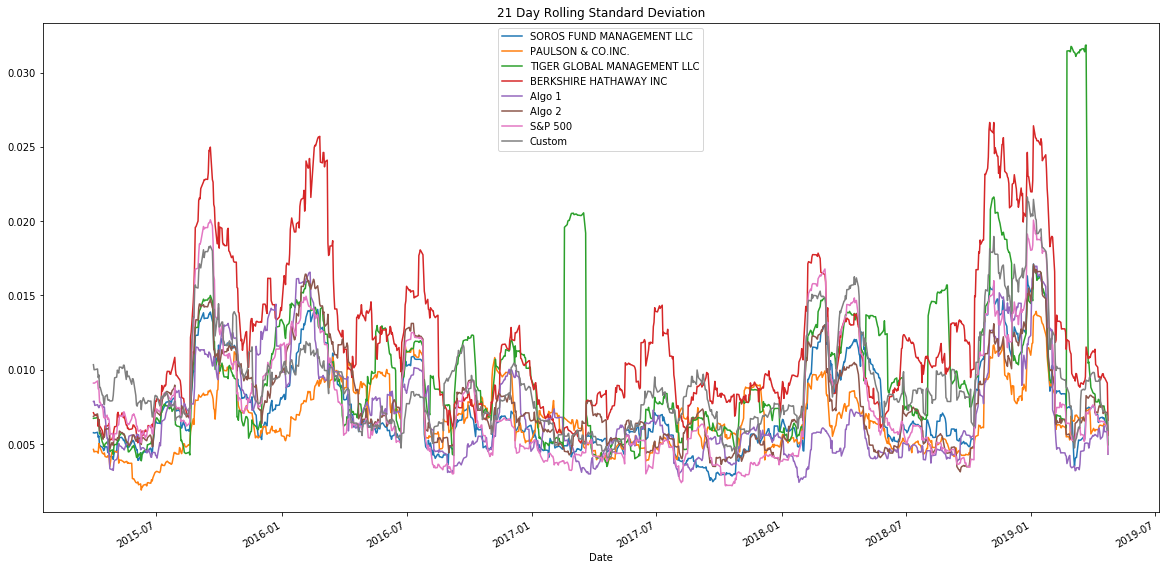

In [46]:
# Calculate and plot the rolling standard deviation for
# the All Return portfolio using a 21 trading day window
combined_rolling_std = all_returns.rolling(window=21).std().plot(title= '21 Day Rolling Standard Deviation',figsize = (20,10))

In [47]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean()*252)/ (all_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom                         0.900597
dtype: float64

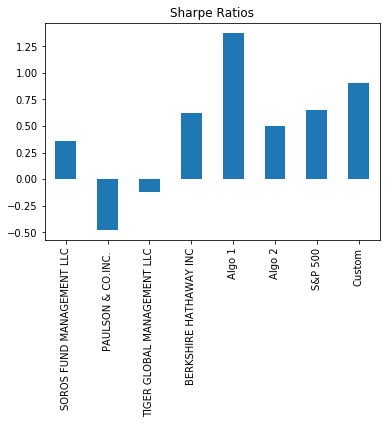

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title = 'Sharpe Ratios')

In [49]:
# Create a correlation analysis
all_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.690735
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.582617
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.492110
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.664485
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.232857
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.691519
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.792061
Custom,0.690735,0.582617,0.492110,0.664485,0.232857,0.691519,0.792061,1.000000


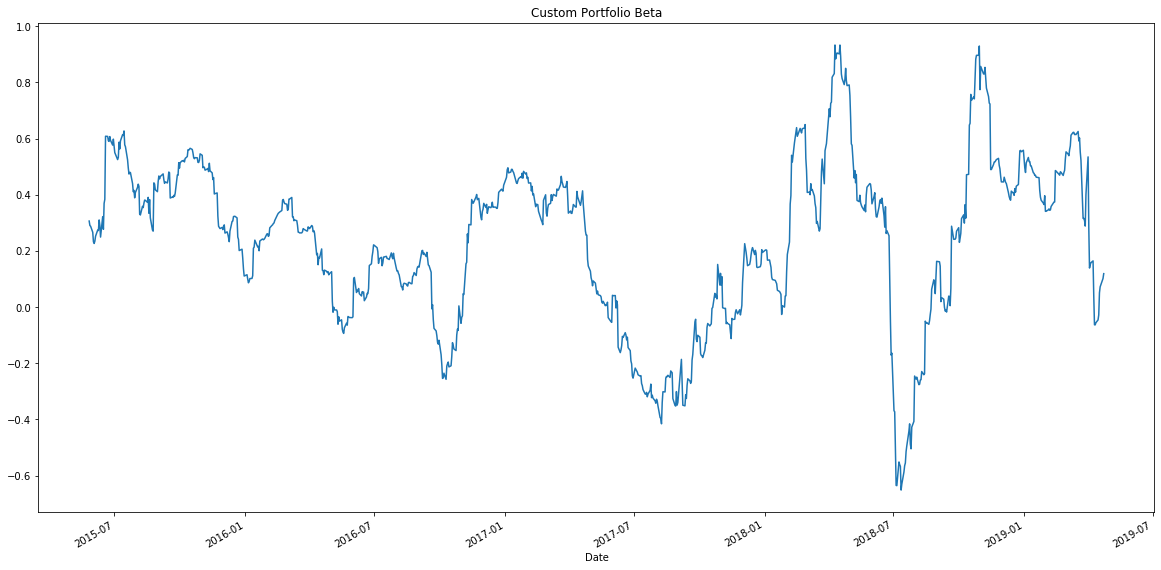

In [50]:
# Beta
rolling_custom_covariance = all_returns['Custom'].rolling(window=60).cov(combined_portfolio['Algo 1'])
rolling_variance = combined_portfolio['Algo 1'].rolling(window=60).var()
rolling_custom_beta = rolling_custom_covariance/rolling_variance
rolling_custom_beta.plot(title= 'Custom Portfolio Beta',figsize= (20,10))